# Computer Vision with PyTorch

In this notebook we will use a subset from a Russian Military Vehicles dataset.

We're going to use 4 different classes:

1. bm-21
2. btr-80
3. t-72
4. t-80

## 2. Get Data

In [ ]:
import torch
from torch import nn

# Note: PyTorch 1.10.0+ is required for this video
torch.__version__

'2.8.0+cu126'

In [ ]:
torch.cuda.is_available()

True

### Setup Device Agnostic Code


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import requests # this library is used to make requests over the internet (HTTP Connection)
import zipfile # Mengimpor modul 'zipfile' untuk bekerja dengan file ZIP (membuka, mengekstrak, dll)
import os # Mengimpor modul 'os' untuk mengakses fungsi sistem operasi (misalnya mencari path absolut)
from pathlib import Path
import gdown # Mengimpor library gdown untuk mengunduh file dari Google Drive

# Setup data path
data_path = Path("data/")
image_path = data_path / "dataset"

if image_path.is_dir():
    print(f"{image_path} directory already exists, skipping download.")
else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Menyimpan ID unik dari file Google Drive
# ID ini bisa ditemukan di URL file Drive (contohnya di link berbentuk https://drive.google.com/file/d/<FILE_ID>/view)
file_id = "1xAfv8py-P6VLjh7aQrJcj3KuanTwb3_a"

# Menentukan nama file hasil download yang akan disimpan di komputer
# Dalam hal ini, file akan disimpan dengan nama "data.zip"
output = "data/data.zip"

# Mengunduh file dari Google Drive menggunakan gdown
# Parameter:
# - id=file_id → menentukan file mana yang akan diunduh berdasarkan ID-nya
# - output=output → menentukan nama file hasil unduhan
# - quiet=False → menampilkan progress bar selama proses download
gdown.download(id=file_id, output=output, quiet=False)



data/dataset does not exist, creating one...


Downloading...
From: https://drive.google.com/uc?id=1xAfv8py-P6VLjh7aQrJcj3KuanTwb3_a
To: /content/data/data.zip
100%|██████████| 13.4M/13.4M [00:00<00:00, 28.9MB/s]


'data/data.zip'

In [ ]:
# Unzip data file .zip
with zipfile.ZipFile(data_path / "data.zip", "r") as zip_ref:
    print("Unzipping military vehicles .zip file...")
    zip_ref.extractall(image_path)

Unzipping military vehicles .zip file...


In [ ]:
os.remove("/content/data/data.zip")

Nice!

Now we have gotten a dataset in our environement successfully in the `Standard Image Classification Format`

`data -> dataset -> train -> class_a, class_b, class_c`

`data -> dataset -> test -> class_a, class_b, class_c`

`data -> dataset -> valid -> class_a, class_b, class_c`

In [ ]:
image_path

PosixPath('data/dataset')

In [ ]:
# Setup directory paths
train_dir = image_path / "train"
test_dir = image_path / "test"

In [ ]:
train_dir

PosixPath('data/dataset/train')

In [ ]:
test_dir

PosixPath('data/dataset/test')

## 2. Becoming one with the data (data preperation and data exploartion)

In [ ]:
for dirpath, dirnames, filenames in list(os.walk(data_path)):
    print(f"There are {len(dirnames)} directories and {len(filenames)} in '{dirpath}'")

There are 1 directories and 0 in 'data'
There are 3 directories and 2 in 'data/dataset'
There are 4 directories and 0 in 'data/dataset/valid'
There are 0 directories and 24 in 'data/dataset/valid/t-80'
There are 0 directories and 18 in 'data/dataset/valid/t-72'
There are 0 directories and 20 in 'data/dataset/valid/btr-80'
There are 0 directories and 18 in 'data/dataset/valid/bm-21'
There are 4 directories and 0 in 'data/dataset/test'
There are 0 directories and 15 in 'data/dataset/test/t-80'
There are 0 directories and 7 in 'data/dataset/test/t-72'
There are 0 directories and 7 in 'data/dataset/test/btr-80'
There are 0 directories and 11 in 'data/dataset/test/bm-21'
There are 4 directories and 0 in 'data/dataset/train'
There are 0 directories and 61 in 'data/dataset/train/t-80'
There are 0 directories and 75 in 'data/dataset/train/t-72'
There are 0 directories and 73 in 'data/dataset/train/btr-80'
There are 0 directories and 71 in 'data/dataset/train/bm-21'


In [ ]:
import os

def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [ ]:
walk_through_dir(image_path)

There are 3 directories and 2 images in 'data/dataset'
There are 4 directories and 0 images in 'data/dataset/valid'
There are 0 directories and 24 images in 'data/dataset/valid/t-80'
There are 0 directories and 18 images in 'data/dataset/valid/t-72'
There are 0 directories and 20 images in 'data/dataset/valid/btr-80'
There are 0 directories and 18 images in 'data/dataset/valid/bm-21'
There are 4 directories and 0 images in 'data/dataset/test'
There are 0 directories and 15 images in 'data/dataset/test/t-80'
There are 0 directories and 7 images in 'data/dataset/test/t-72'
There are 0 directories and 7 images in 'data/dataset/test/btr-80'
There are 0 directories and 11 images in 'data/dataset/test/bm-21'
There are 4 directories and 0 images in 'data/dataset/train'
There are 0 directories and 61 images in 'data/dataset/train/t-80'
There are 0 directories and 75 images in 'data/dataset/train/t-72'
There are 0 directories and 73 images in 'data/dataset/train/btr-80'
There are 0 directories 

In [ ]:
train_dir

PosixPath('data/dataset/train')

In [ ]:
test_dir

PosixPath('data/dataset/test')

In [ ]:
image_path

PosixPath('data/dataset')

Random image path: data/dataset/train/bm-21/89_jpg.rf.998b282d61e96591a82c76282679cdd6.jpg
Image class: bm-21
Image height: 416
Image width: 416


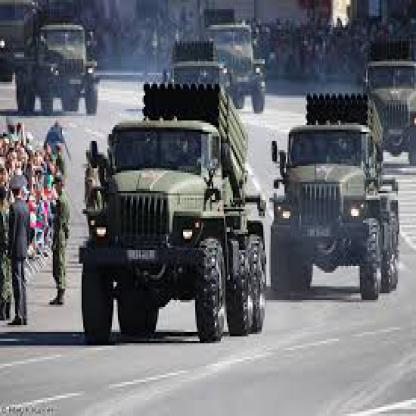

In [ ]:
import random
from PIL import Image

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

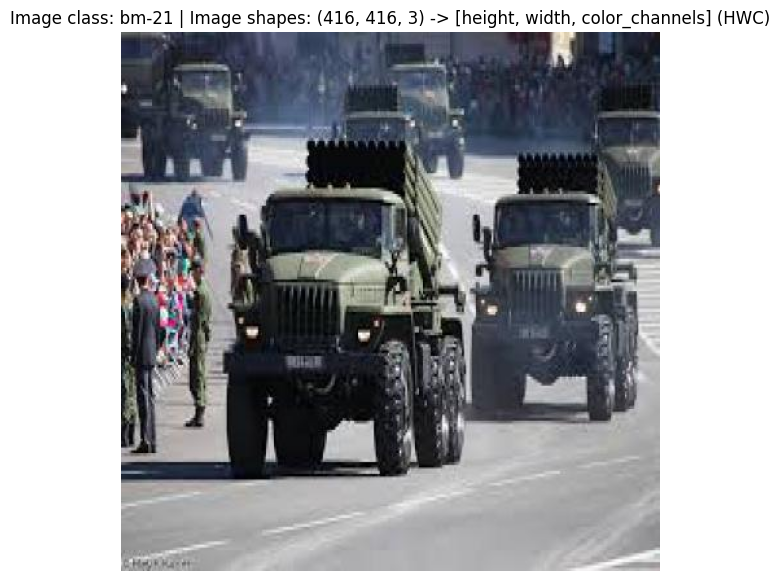

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # for visuslization in python

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shapes: {img_as_array.shape} -> [height, width, color_channels] (HWC)")
plt.axis("off")
plt.show()

array([[[ 99, 104, 100],
        [ 99, 104, 100],
        [ 98, 103,  99],
        ...,
        [ 30,  24,  26],
        [ 32,  26,  26],
        [ 30,  25,  22]],

       [[ 98, 102, 101],
        [ 98, 102, 101],
        [ 97, 101, 100],
        ...,
        [ 29,  23,  25],
        [ 31,  25,  25],
        [ 30,  25,  22]],

       [[ 78,  82,  83],
        [ 78,  82,  83],
        [ 77,  81,  82],
        ...,
        [ 28,  24,  25],
        [ 30,  26,  25],
        [ 28,  24,  23]],

       ...,

       [[155, 155, 155],
        [162, 162, 162],
        [162, 162, 162],
        ...,
        [173, 167, 169],
        [175, 166, 169],
        [174, 165, 168]],

       [[150, 150, 150],
        [161, 161, 161],
        [166, 166, 166],
        ...,
        [196, 187, 190],
        [195, 186, 189],
        [194, 185, 188]],

       [[149, 149, 149],
        [164, 164, 164],
        [162, 162, 162],
        ...,
        [198, 189, 192],
        [196, 187, 190],
        [194, 185, 188]]], dtype=uint8)
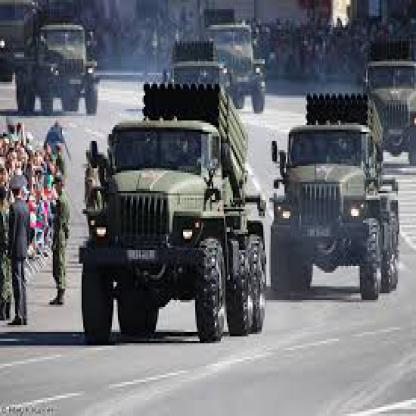

In [ ]:
 img_as_array

## 3. Transforming Data

Before we can use our image data with PyTorch:
1. Turn our target data into tensors (in our case, numerical representation of our images)
2. Turn it into `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader` we'll call these two `Dataset` and `DataLoader`

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with `torchvision.transforms`

In [ ]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize our images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal axis
    transforms.RandomHorizontalFlip(p=0.5),
    # transforms.RandomRotation(degrees=180),
    # Turn the image into a torch.tensor
    transforms.ToTensor()
])

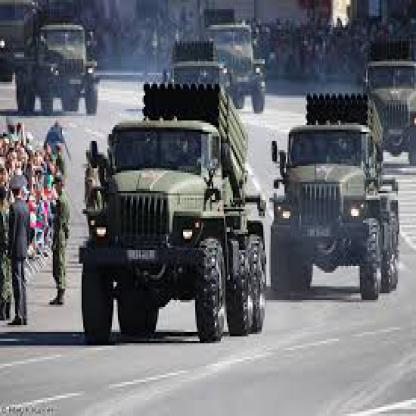

In [ ]:
img

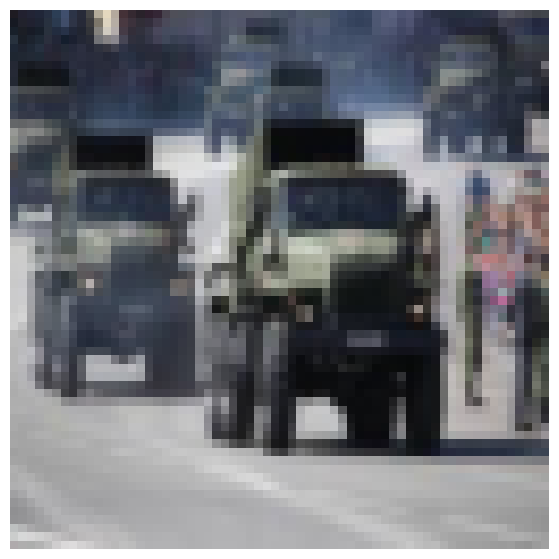

In [ ]:
plt.figure(figsize=(10, 7))
plt.imshow(data_transform(img).permute(1, 2, 0))
plt.axis("off")
plt.show()

In [ ]:
data_transform(img)

tensor([[[0.2549, 0.2471, 0.2784,  ..., 0.1333, 0.1333, 0.1176],
         [0.1490, 0.1373, 0.1804,  ..., 0.1255, 0.1294, 0.0863],
         [0.1490, 0.1451, 0.1765,  ..., 0.0902, 0.1059, 0.0941],
         ...,
         [0.5804, 0.5922, 0.6039,  ..., 0.6627, 0.7098, 0.7412],
         [0.6235, 0.6431, 0.6667,  ..., 0.8392, 0.8431, 0.7961],
         [0.6275, 0.6078, 0.5765,  ..., 0.6784, 0.6863, 0.6863]],

        [[0.2706, 0.2588, 0.2863,  ..., 0.1412, 0.1294, 0.1059],
         [0.1647, 0.1529, 0.2000,  ..., 0.1294, 0.1333, 0.0980],
         [0.1725, 0.1686, 0.2078,  ..., 0.1059, 0.1176, 0.1255],
         ...,
         [0.5804, 0.5922, 0.6039,  ..., 0.6588, 0.7137, 0.7529],
         [0.6235, 0.6431, 0.6667,  ..., 0.8353, 0.8471, 0.8039],
         [0.6275, 0.6078, 0.5765,  ..., 0.6824, 0.6824, 0.6667]],

        [[0.2941, 0.2824, 0.3137,  ..., 0.2078, 0.1882, 0.1333],
         [0.2549, 0.2431, 0.2863,  ..., 0.1882, 0.1725, 0.1333],
         [0.2706, 0.2667, 0.3020,  ..., 0.1490, 0.1451, 0.

In [ ]:
image_path_list

[PosixPath('data/dataset/valid/t-80/92_jpg.rf.6f065a9bffe5f0cbc6c1e3b3dc08b250.jpg'),
 PosixPath('data/dataset/valid/t-80/67_jpg.rf.36d8c19dcceb80a7689e878affe153a6.jpg'),
 PosixPath('data/dataset/valid/t-80/12_jpg.rf.4f426c77fd97c175e6e3d71f0a04aa6c.jpg'),
 PosixPath('data/dataset/valid/t-80/77_jpg.rf.09cdf85f3b7fbaaea2f3f37a2959f45e.jpg'),
 PosixPath('data/dataset/valid/t-80/6_jpg.rf.eddcff7e01390f4bc64fb229deb2793f.jpg'),
 PosixPath('data/dataset/valid/t-80/29_jpg.rf.518b0ecb917a29300796b67926e634f1.jpg'),
 PosixPath('data/dataset/valid/t-80/33_jpg.rf.623728b52831f71d6dcc8bcd595fe17d.jpg'),
 PosixPath('data/dataset/valid/t-80/93_jpg.rf.66ed05029168181bf5b7f9767af02365.jpg'),
 PosixPath('data/dataset/valid/t-80/58_jpg.rf.ba0c05af35dbc1c3181742a6f4c5633c.jpg'),
 PosixPath('data/dataset/valid/t-80/96_jpg.rf.061d46e04b507962ed21f53f6e639fe3.jpg'),
 PosixPath('data/dataset/valid/t-80/41_jpg.rf.34dd2dc6fd42fe8405804a7a7bb50667.jpg'),
 PosixPath('data/dataset/valid/t-80/23_jpg.rf.fa3ac7d82

In [ ]:
random.sample(image_path_list, k=10)

[PosixPath('data/dataset/train/t-72/79_png.rf.bf57e43d18071853f47d4644c739888c.jpg'),
 PosixPath('data/dataset/test/bm-21/67_jpg.rf.7ef13fa9187588165185c14bddc9ecb7.jpg'),
 PosixPath('data/dataset/train/bm-21/92_jpg.rf.30c976745766d83b1ea93ce8588c1b30.jpg'),
 PosixPath('data/dataset/valid/btr-80/68_jpg.rf.6969575953f0f8332b99f653880e3175.jpg'),
 PosixPath('data/dataset/train/btr-80/36_jpg.rf.e61af7fccd9099ded59ed4e882a97e91.jpg'),
 PosixPath('data/dataset/valid/btr-80/70_jpg.rf.f89c2282c8f858298c969e8edb51ec1a.jpg'),
 PosixPath('data/dataset/test/bm-21/51_jpg.rf.40676b6f4f0899273a1f8b5ce6f3784f.jpg'),
 PosixPath('data/dataset/train/btr-80/89_jpg.rf.23f38b5b8f3b8f74a8d486fc52b1081c.jpg'),
 PosixPath('data/dataset/train/bm-21/20_jpg.rf.c53e883300259cf08403ddc8f06926a7.jpg'),
 PosixPath('data/dataset/train/btr-80/51_jpg.rf.e10786605d149f42b6be18e4c0629054.jpg')]

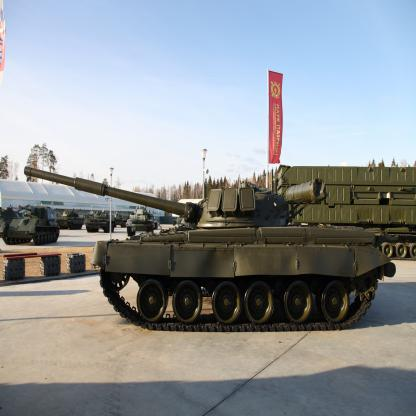

In [ ]:
Image.open(random.choice(image_path_list))

In [ ]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):

    """
    Selects random images from a path of images and loads/transforms them
    then plots the original vs the transformed version.
    """

    if seed:
        random.seed(seed)

    random_image_paths = random.sample(image_paths, k=n)

    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

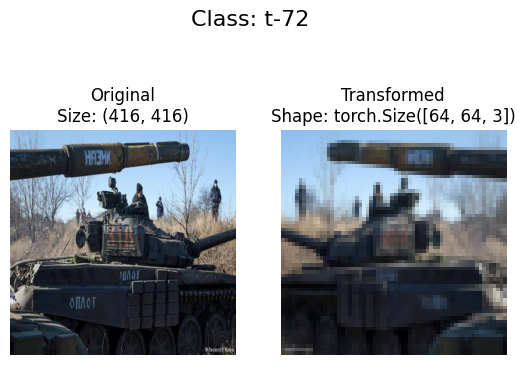

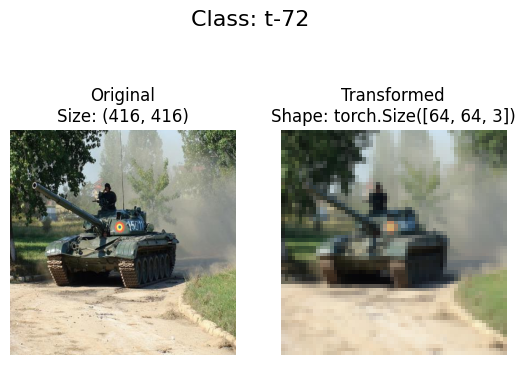

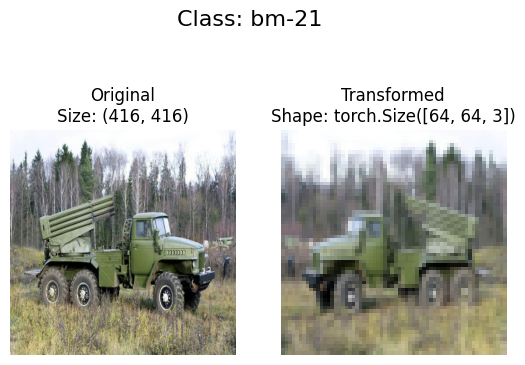

In [ ]:
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)

## 4. Loading Image Data using Image Folder

In [ ]:
train_dir

PosixPath('data/dataset/train')

In [ ]:
test_dir

PosixPath('data/dataset/test')

In [ ]:
data_transform

Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

In [ ]:
# Use ImageFolder to create datasets

from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir, # Fetch images form inside folders
                                  transform=data_transform,
                                  target_transform=None) # we don't want to transform the targets of our images

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

In [ ]:
train_data

Dataset ImageFolder
    Number of datapoints: 280
    Root location: data/dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [ ]:
test_data

Dataset ImageFolder
    Number of datapoints: 40
    Root location: data/dataset/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [ ]:
train_data[0]

(tensor([[[0.7843, 0.7843, 0.7725,  ..., 0.4118, 0.3373, 0.4078],
          [0.6784, 0.6667, 0.7490,  ..., 0.4510, 0.3216, 0.3255],
          [0.6471, 0.6549, 0.6353,  ..., 0.3490, 0.3176, 0.3333],
          ...,
          [0.6431, 0.6431, 0.6353,  ..., 0.5490, 0.5608, 0.5725],
          [0.6431, 0.6392, 0.6392,  ..., 0.5451, 0.5686, 0.5804],
          [0.6431, 0.6392, 0.6353,  ..., 0.5294, 0.5647, 0.5882]],
 
         [[0.8118, 0.7961, 0.7804,  ..., 0.4157, 0.3451, 0.4157],
          [0.6902, 0.6863, 0.7608,  ..., 0.4549, 0.3255, 0.3294],
          [0.6392, 0.6510, 0.6471,  ..., 0.3569, 0.3216, 0.3373],
          ...,
          [0.6353, 0.6353, 0.6314,  ..., 0.5490, 0.5569, 0.5725],
          [0.6353, 0.6314, 0.6353,  ..., 0.5333, 0.5569, 0.5686],
          [0.6353, 0.6314, 0.6353,  ..., 0.5020, 0.5412, 0.5647]],
 
         [[0.8235, 0.8157, 0.8039,  ..., 0.4275, 0.3529, 0.4118],
          [0.7098, 0.7020, 0.7882,  ..., 0.4706, 0.3412, 0.3373],
          [0.6627, 0.6745, 0.6824,  ...,

In [ ]:
# Get class names as list
class_names = train_data.classes
class_names

['bm-21', 'btr-80', 't-72', 't-80']

In [ ]:

# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'bm-21': 0, 'btr-80': 1, 't-72': 2, 't-80': 3}

In [ ]:
# Check the lengts of our dataset
len(train_data), len(test_data)

(280, 40)

In [ ]:
train_data.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [ ]:
test_data.classes

['bm-21', 'btr-80', 't-72', 't-80']

In [ ]:
image, label = train_data[0][0], train_data[0][1]

In [ ]:
image

tensor([[[0.7843, 0.7843, 0.7725,  ..., 0.4118, 0.3373, 0.4078],
         [0.6784, 0.6667, 0.7490,  ..., 0.4510, 0.3216, 0.3255],
         [0.6471, 0.6549, 0.6353,  ..., 0.3490, 0.3176, 0.3333],
         ...,
         [0.6431, 0.6431, 0.6353,  ..., 0.5490, 0.5608, 0.5725],
         [0.6431, 0.6392, 0.6392,  ..., 0.5451, 0.5686, 0.5804],
         [0.6431, 0.6392, 0.6353,  ..., 0.5294, 0.5647, 0.5882]],

        [[0.8118, 0.7961, 0.7804,  ..., 0.4157, 0.3451, 0.4157],
         [0.6902, 0.6863, 0.7608,  ..., 0.4549, 0.3255, 0.3294],
         [0.6392, 0.6510, 0.6471,  ..., 0.3569, 0.3216, 0.3373],
         ...,
         [0.6353, 0.6353, 0.6314,  ..., 0.5490, 0.5569, 0.5725],
         [0.6353, 0.6314, 0.6353,  ..., 0.5333, 0.5569, 0.5686],
         [0.6353, 0.6314, 0.6353,  ..., 0.5020, 0.5412, 0.5647]],

        [[0.8235, 0.8157, 0.8039,  ..., 0.4275, 0.3529, 0.4118],
         [0.7098, 0.7020, 0.7882,  ..., 0.4706, 0.3412, 0.3373],
         [0.6627, 0.6745, 0.6824,  ..., 0.3608, 0.3216, 0.

In [ ]:
label

0

In [ ]:
print(f"Image tensor:\n {image}")
print(f"Image shape: {image.shape}")
print(f"Image datatype: {image.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.7843, 0.7843, 0.7725,  ..., 0.4118, 0.3373, 0.4078],
         [0.6784, 0.6667, 0.7490,  ..., 0.4510, 0.3216, 0.3255],
         [0.6471, 0.6549, 0.6353,  ..., 0.3490, 0.3176, 0.3333],
         ...,
         [0.6431, 0.6431, 0.6353,  ..., 0.5490, 0.5608, 0.5725],
         [0.6431, 0.6392, 0.6392,  ..., 0.5451, 0.5686, 0.5804],
         [0.6431, 0.6392, 0.6353,  ..., 0.5294, 0.5647, 0.5882]],

        [[0.8118, 0.7961, 0.7804,  ..., 0.4157, 0.3451, 0.4157],
         [0.6902, 0.6863, 0.7608,  ..., 0.4549, 0.3255, 0.3294],
         [0.6392, 0.6510, 0.6471,  ..., 0.3569, 0.3216, 0.3373],
         ...,
         [0.6353, 0.6353, 0.6314,  ..., 0.5490, 0.5569, 0.5725],
         [0.6353, 0.6314, 0.6353,  ..., 0.5333, 0.5569, 0.5686],
         [0.6353, 0.6314, 0.6353,  ..., 0.5020, 0.5412, 0.5647]],

        [[0.8235, 0.8157, 0.8039,  ..., 0.4275, 0.3529, 0.4118],
         [0.7098, 0.7020, 0.7882,  ..., 0.4706, 0.3412, 0.3373],
         [0.6627, 0.6745, 0.6824,  ..., 0.3

In [ ]:
class_names[label]

'bm-21'

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


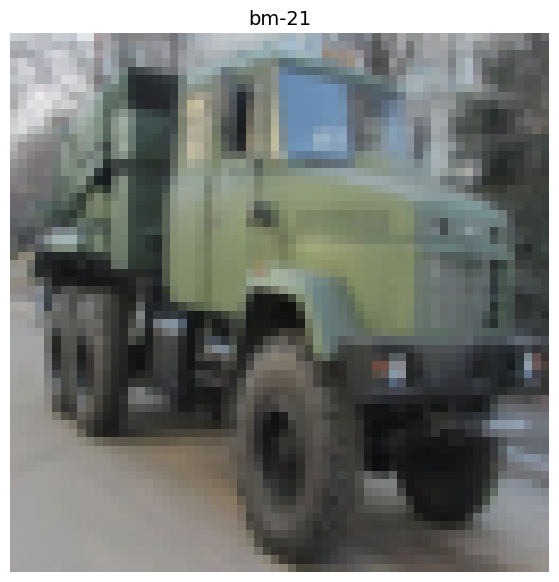

In [ ]:
# Rearrange the order of dimensions
img_permute = image.permute(1, 2, 0)

# Print out different shapes
print(f"Original shape: {image.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14);

## 4.1 turn loaded images into `DataLoaders`

In [ ]:
!nvidia-smi

Fri Oct 31 01:49:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   61C    P0             30W /   70W |     166MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
os.cpu_count()

2

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1 # Batch size is 32 (YOU CAN CHANGE THIS TO WHATEVER YOU WANT)

NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=NUM_WORKERS)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79dd7c2da360>,
 <torch.utils.data.dataloader.DataLoader at 0x79dd7e5b9040>)

In [ ]:
train_dataloader

In [ ]:
test_dataloader

In [ ]:
img_batch, label_batch = next(iter(train_dataloader))

print(f"Image shape: {img_batch.shape} -> [batch_size, color_channels, height, width]")
print(f"Label batch shape: {label_batch.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label batch shape: torch.Size([1])


In [ ]:
label_batch

tensor([2])

In [ ]:
test_image_batch, test_label_batch = next(iter(test_dataloader))

In [ ]:
test_label_batch

tensor([0])

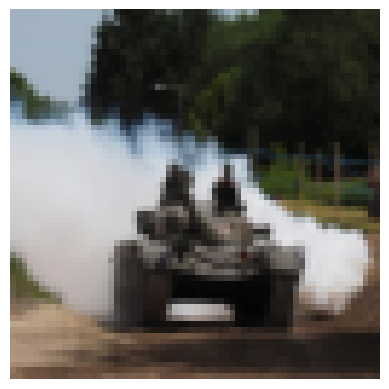

In [ ]:
plt.imshow(img_batch[0].permute(1, 2, 0))
plt.axis("off")
plt.show()

In [ ]:
from typing import List, Tuple, Dict

In [ ]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 1. Adjust display if n is too high
    if n > 5:
        n = 10
        display_shape = False
        classes = False
        print(f"For display puporses, n shouldn't be larger than 10, setting to 10 and removing shape display")

    # 2. Set the seed
    if seed:
        random.seed(seed)

    # 3. Get rnadom sample indexes
    random_sample_idx = random.sample(range(len(dataset)), k=n)

    # 4. Setup plot
    plt.figure(figsize=(16, 8))

    # 5. Loop through random indexes and plot them with matplotlib
    for i, targ_sample in enumerate(random_sample_idx):
        targ_sample, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 6. Adjust tensor dimensions for plotting
        targ_image_adjust = targ_sample.permute(1, 2, 0) # [color_channels, height, width] -> [height, width, color_channels]

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")

        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nShape: {targ_image_adjust.shape}"
        plt.title(title)

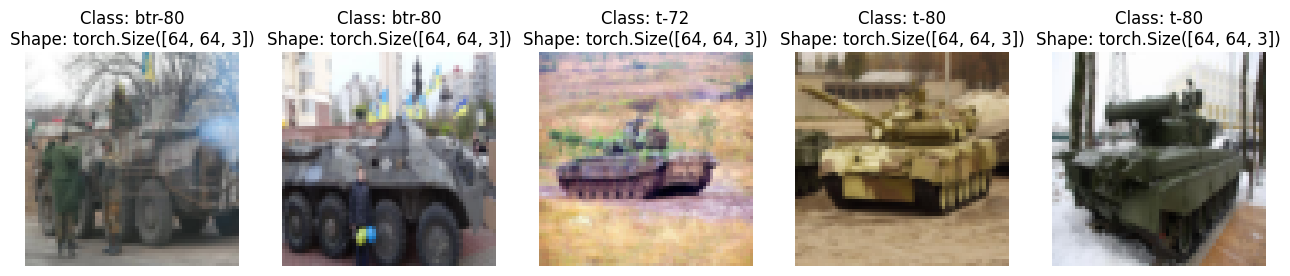

In [ ]:
# Call the function and plot random images
display_random_images(dataset=train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

## 5. Building a computer vision model - image classification model (TinyVGG Architecture)

In [ ]:
class TinyVGG(nn.Module):
    """
    Model architecture copying the TinyVGG from CNN Explainer.
    """

    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:

        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=(3, 3), # (1x1) (5x5) (7x7) (10x10)
                      stride=(1, 1), # 2
                      padding=0), # (0 - valid) (1 - padding) (2 - output shape > input_shape)
            nn.ReLU(), # learn complex non-linear relationships,
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=0),
            nn.ReLU(),
            # Max Pool helps us reduce overfitting
            # Max pool helps us make the processing and computing faster
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2)) # default stride value is same as kernel_sie
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(), # flatten the feature map matrix into a feature vector (1D) to be able to pass into the linear layer and classify
            nn.Linear(in_features=hidden_units*13*13,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


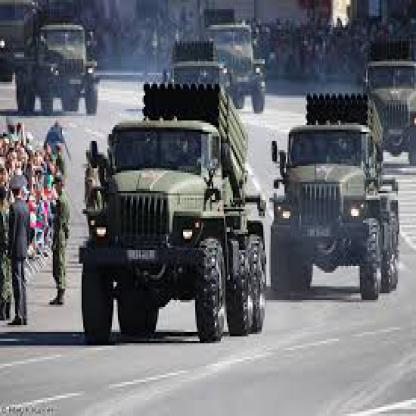

In [ ]:

img

In [ ]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [ ]:
len(class_names)

4

In [ ]:
device

'cuda'

In [ ]:
# Instatiating a new instance of the TinyVGG model

torch.manual_seed(42)

model = TinyVGG(input_shape=3, # number of color channels in our image data
                hidden_units=10,
                output_shape=len(class_names)).to(device)

model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=4, bias=True)
  )
)

## 5.1 Try a dummy forward pass by passing a single image

In [ ]:
# Get a single image batch and label batch
image_batch, label_batch = next(iter(train_dataloader))

image_batch.shape, label_batch.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [ ]:
image_batch.shape

torch.Size([1, 3, 64, 64])

In [ ]:
label_batch

tensor([2])

In [ ]:
model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=4, bias=True)
  )
)

In [ ]:
image_batch.device

device(type='cpu')

In [ ]:
image_batch.shape

torch.Size([1, 3, 64, 64])

In [ ]:
# Try a forward pass
logits = model(image_batch.to(device))

In [ ]:
logits.argmax(dim=1)

tensor([2], device='cuda:0')

### 5.2 Use `torchinfo` to get an idea of the shapes going through the model

In [ ]:
try:
    import torchinfo
except:
    !pip install -q torchinfo
    import torchinfo

In [ ]:
from torchinfo import summary

In [ ]:
model(image_batch[0].unsqueeze(dim=0).to(device))

tensor([[-0.0041,  0.0211,  0.0424, -0.0178]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
summary(model=model,
        input_size=[1, 3, 64, 64]) # an example of the input image shape

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 4]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### 6. Creating a training loop and testing loop to train and evaluate our model

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):

    """
    This function will train a model on the dataloader
    and optimizes the model's paramters to better represent our data.
    """

    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy value
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):

        # Send data to the target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X) # outputs raw scores (logits)

        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() # Accumulate the train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Apply backpropgation algorithm
        loss.backward()

        # 5. Optimizer step (Gradient Descent Algorithm)
        optimizer.step() # to improve the weights and biases of the model

        # Calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)

    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):

    # Put model in eval mode
    model.eval()

    # Setup the test loss and test accuracy values
    test_loss , test_acc = 0, 0

    # Turn on inference mode
    with torch.inference_mode():

        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):

            # Send data to the target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calcualte the loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # 3. Calculate the accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))

        # Adjust metrics to get average loss and accuracy per batch
        test_loss = test_loss / len(dataloader)
        test_acc = test_acc / len(dataloader)


        return test_loss, test_acc

### Creating a function `train()` to combine `train_step()` and `test_step()`

In [ ]:
from tqdm.auto import tqdm
# Combine train_step() and test_step() both and calls them toghether in one hit
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.BCELoss(),
          epochs: int = 5, # 5 epochs be default
          device=device):

    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):

        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)

        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | test_acc: {test_acc:.4f}")

        # Update the results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results



In [ ]:
class_names

['bm-21', 'btr-80', 't-72', 't-80']

In [ ]:
# Set random seeds

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model = TinyVGG(input_shape=3,
                hidden_units=32,
                output_shape=len(class_names)).to(device)


# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # we are dealing with multi class classification

optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train the model

model_results = train(model=model,
                      train_dataloader=train_dataloader,
                      test_dataloader=test_dataloader,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.4015 | Train acc: 0.2321 | Test loss: 1.3893 | test_acc: 0.2750
Epoch: 1 | Train Loss: 1.3921 | Train acc: 0.2179 | Test loss: 1.3926 | test_acc: 0.1750
Epoch: 2 | Train Loss: 1.3870 | Train acc: 0.2643 | Test loss: 1.3941 | test_acc: 0.2750
Epoch: 3 | Train Loss: 1.3863 | Train acc: 0.2393 | Test loss: 1.3948 | test_acc: 0.1750
Epoch: 4 | Train Loss: 1.3854 | Train acc: 0.2429 | Test loss: 1.3972 | test_acc: 0.1750
Epoch: 5 | Train Loss: 1.3849 | Train acc: 0.2321 | Test loss: 1.3995 | test_acc: 0.1750
Epoch: 6 | Train Loss: 1.3848 | Train acc: 0.2500 | Test loss: 1.4020 | test_acc: 0.1750
Epoch: 7 | Train Loss: 1.3848 | Train acc: 0.2679 | Test loss: 1.4041 | test_acc: 0.1750
Epoch: 8 | Train Loss: 1.3844 | Train acc: 0.2500 | Test loss: 1.4047 | test_acc: 0.1750
Epoch: 9 | Train Loss: 1.3842 | Train acc: 0.2679 | Test loss: 1.4068 | test_acc: 0.1750
Epoch: 10 | Train Loss: 1.3841 | Train acc: 0.2679 | Test loss: 1.4083 | test_acc: 0.1750
Epoch: 11 | Train Lo

In [ ]:
Epoch: 9 | Train Loss: 0.9759 | Train acc: 0.5957 | Test loss: 1.3401 | test_acc: 0.4344


SyntaxError: invalid syntax (ipython-input-1528149665.py, line 1)

In [ ]:
model_results

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):

    """Plots training curves of a results dicitionary."""


    # Get the loss values of the results dictioary (traininig and test)
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    # Get the accuracy values of the results dictioanay (training and test)
    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    # Figure out how many epochs there were
    epochs = range(len(results["train_loss"]))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot the loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot the accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_acc")
    plt.plot(epochs, test_accuracy, label="test_acc")
    plt.title("Accuracy %")
    plt.xlabel("Epochs")
    plt.legend()

In [ ]:
plot_loss_curves(model_results)